In [55]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle

from random import choice, sample
from utils import *

In [7]:
DATADIR = os.path.join("data", "clean")

x_train = pd.read_pickle(os.path.join(DATADIR, "clean_x_train.pkl"))
x_test = pd.read_pickle(os.path.join(DATADIR, "clean_x_test.pkl"))
y_train = pd.read_pickle(os.path.join(DATADIR, "clean_y_train.pkl"))
y_test = pd.read_pickle(os.path.join(DATADIR, "clean_y_test.pkl"))

with open(os.path.join(DATADIR, "posterior_samples.pkl"), "rb") as infile:
    posterior_samples = pickle.load(infile)

with open(os.path.join(DATADIR, "prior_samples.pkl"), "rb") as infile:
    prior_samples = pickle.load(infile)

In [97]:
dim0_label = "Cholesterol"
dim1_label = "MaxHR"

def label_colors(labels, col1="tab:orange", col2="tab:blue"):
    return [col1 if label == 1 else col2 for label in labels]

def proba_alphas(probas):
    return [np.abs(0.5 - proba) * 2 for proba in probas]

def plot_2d_gp(x_train, y_labels, y_probas, ax):
    ax.scatter(x_train[:,0], x_train[:,1], alpha=proba_alphas(y_probas), c=label_colors(y_labels))

def get_labels(sample):
    return [1 if x >= 0.5 else 0 for x in sigmoid(sample)]

def mean_sample(samples):
    return np.mean(np.vstack(samples), axis=0)

def plot_mean_samples(pop_sample, sample_size=100, ncol=4, nrow=4, **kwargs):
    mean_samples = [mean_sample([choice(pop_sample) for _ in range(sample_size)]) for _ in range(nrow * ncol - 1)]
    fig = compare_samples_with_original(x_train, y_train, mean_samples, nrow=nrow, ncol=ncol, **kwargs)
    return fig

def compare_samples_with_original(x_train, y_train, samples, nrow = 4, ncol = 4, plot_proba = True):
    fig, axs = plt.subplots(nrow, ncol, figsize=(12, 12), tight_layout=True, sharey=True, sharex=True)
    plot_2d_gp(x_train, y_train, y_train, axs.ravel()[0])
    for ax in axs.ravel()[1:]:
        sample = choice(samples)
        sample_labels = get_labels(sample)
        sample_alpha = sigmoid(sample) if plot_proba else sample_labels
        plot_2d_gp(x_train, sample_labels, sample_alpha, ax)
    return fig

def plot_1d_comparison(x_dim, x, y, sample:list, title, num_samples = 50, ncol=2, nrow=2):
    fig, axs = plt.subplots(nrow, ncol, figsize=(20, 12), sharex=True, sharey=True, tight_layout=True)
    for ax in axs.ravel():
        samples = np.array([choice(sample) for _ in range(num_samples)])
        plot_gp_samples(x, samples, ax=ax, x_dim=x_dim)
        pred_labels = get_labels(mean_sample(samples))
        pred_colors = ["tab:blue" if pred == true else "black" for pred, true in zip(pred_labels, y)]
        ax.scatter(x[:,x_dim], y, c=pred_colors)
        ax.axhline(0.5, color="black", linestyle="dashed")
    fig.suptitle(title)
    return fig


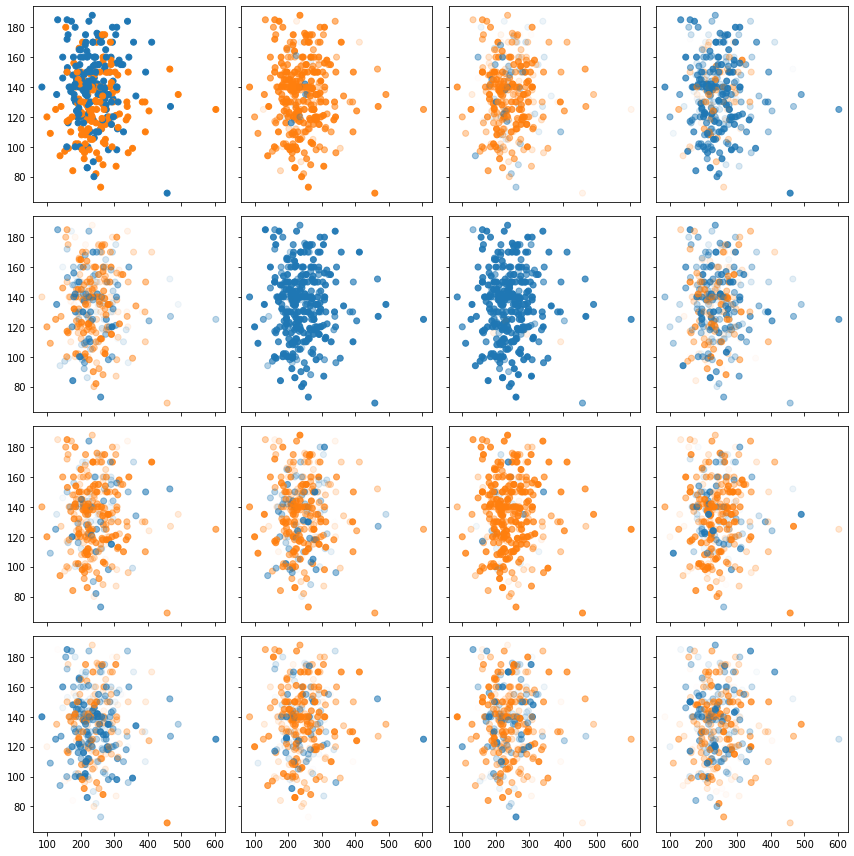

In [104]:
prior_comparison = compare_samples_with_original(x_train, y_train, prior_samples, plot_proba = True)

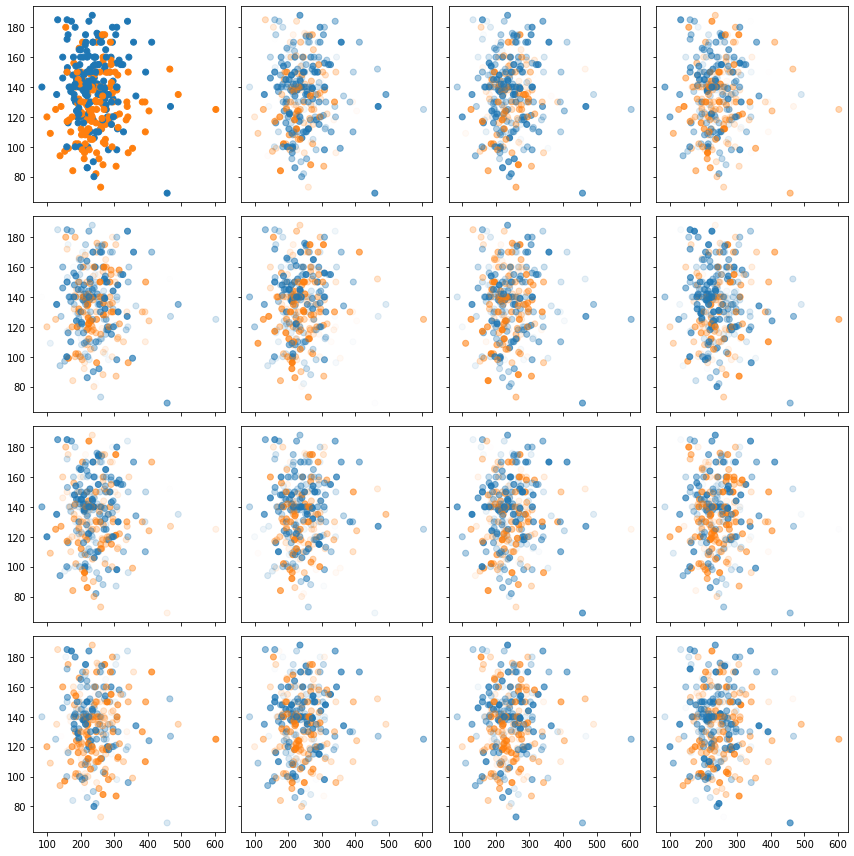

In [106]:
posterior_comparison = compare_samples_with_original(x_train, y_train, posterior_samples, plot_proba = True)

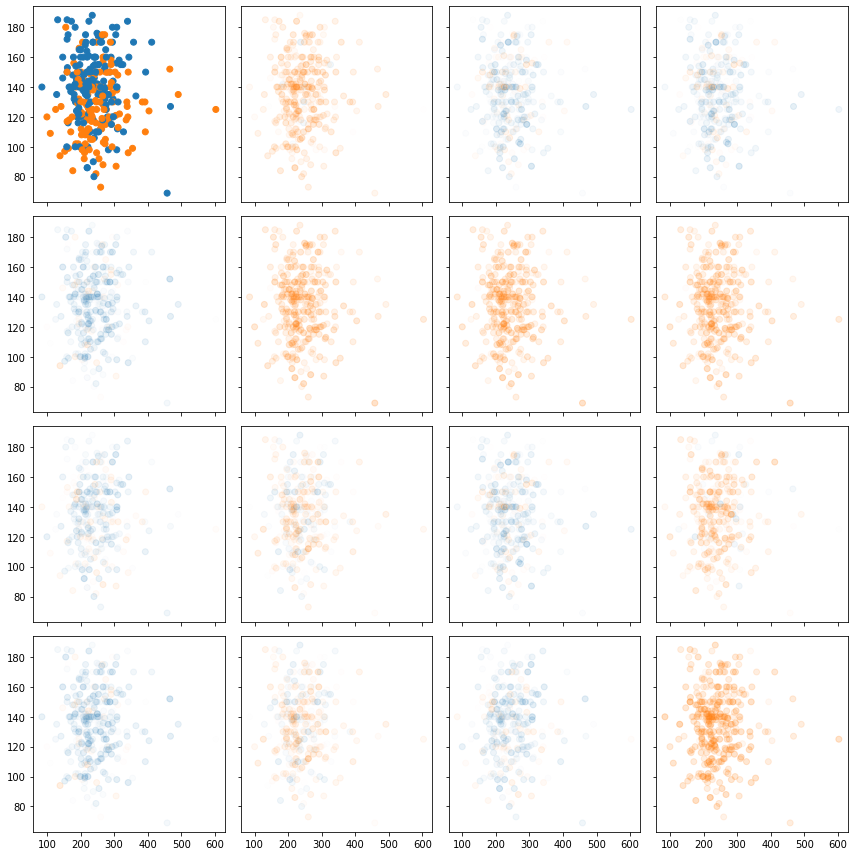

In [63]:
prior_mean_fig = plot_mean_samples(prior_samples)

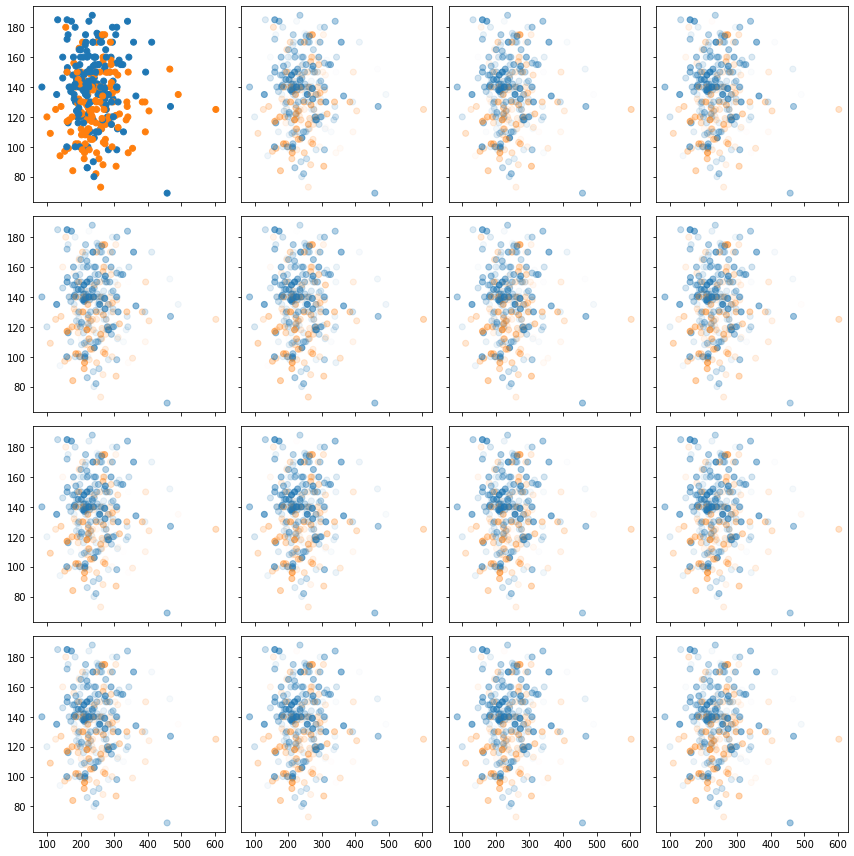

In [107]:
posterior_mean_fig = plot_mean_samples(posterior_samples, plot_proba=True)

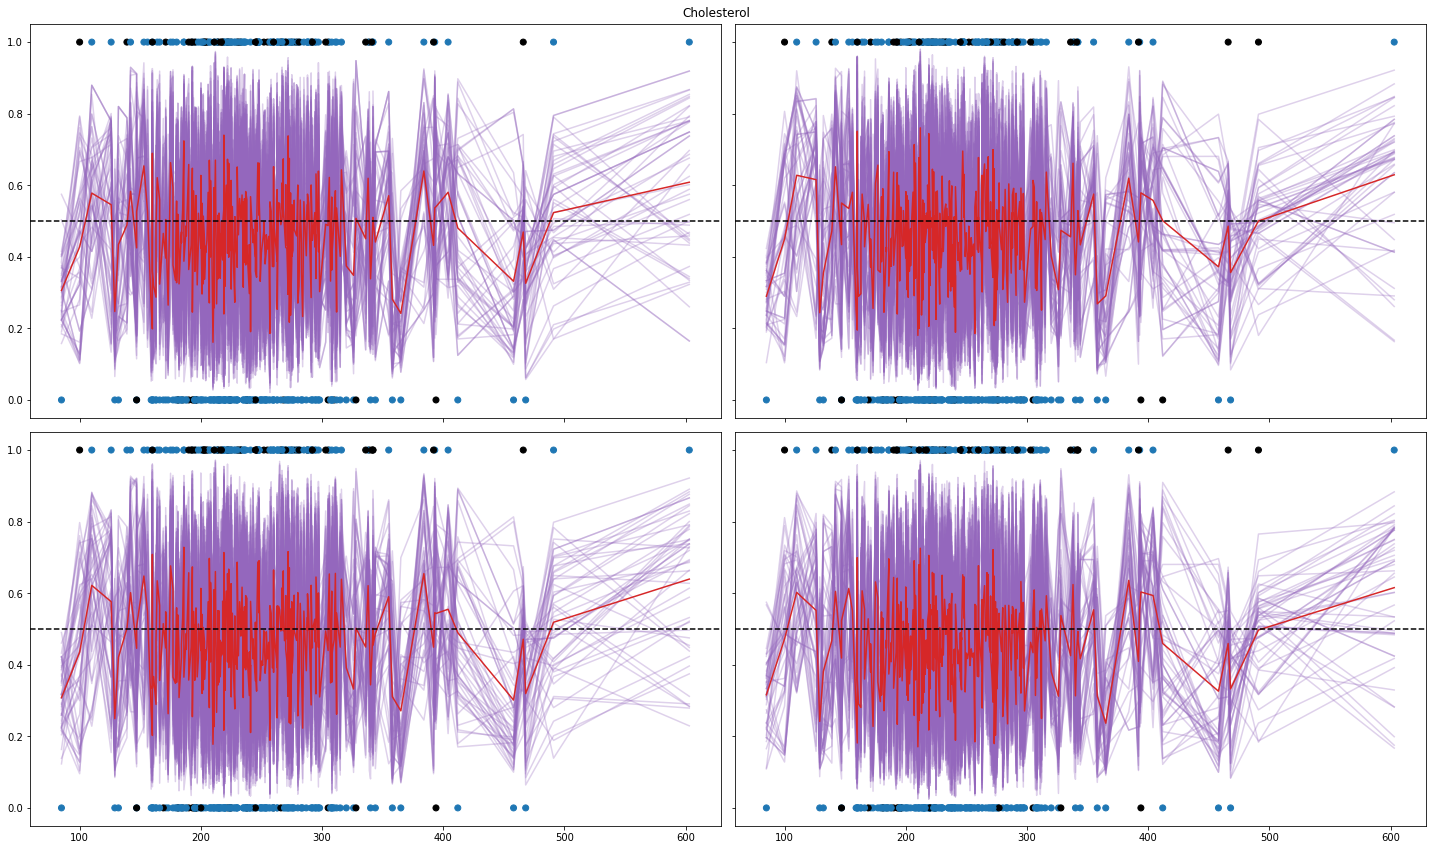

In [99]:
chol_posterior_fig = plot_1d_comparison(0, x_train, y_train, posterior_samples.tolist(), dim0_label)

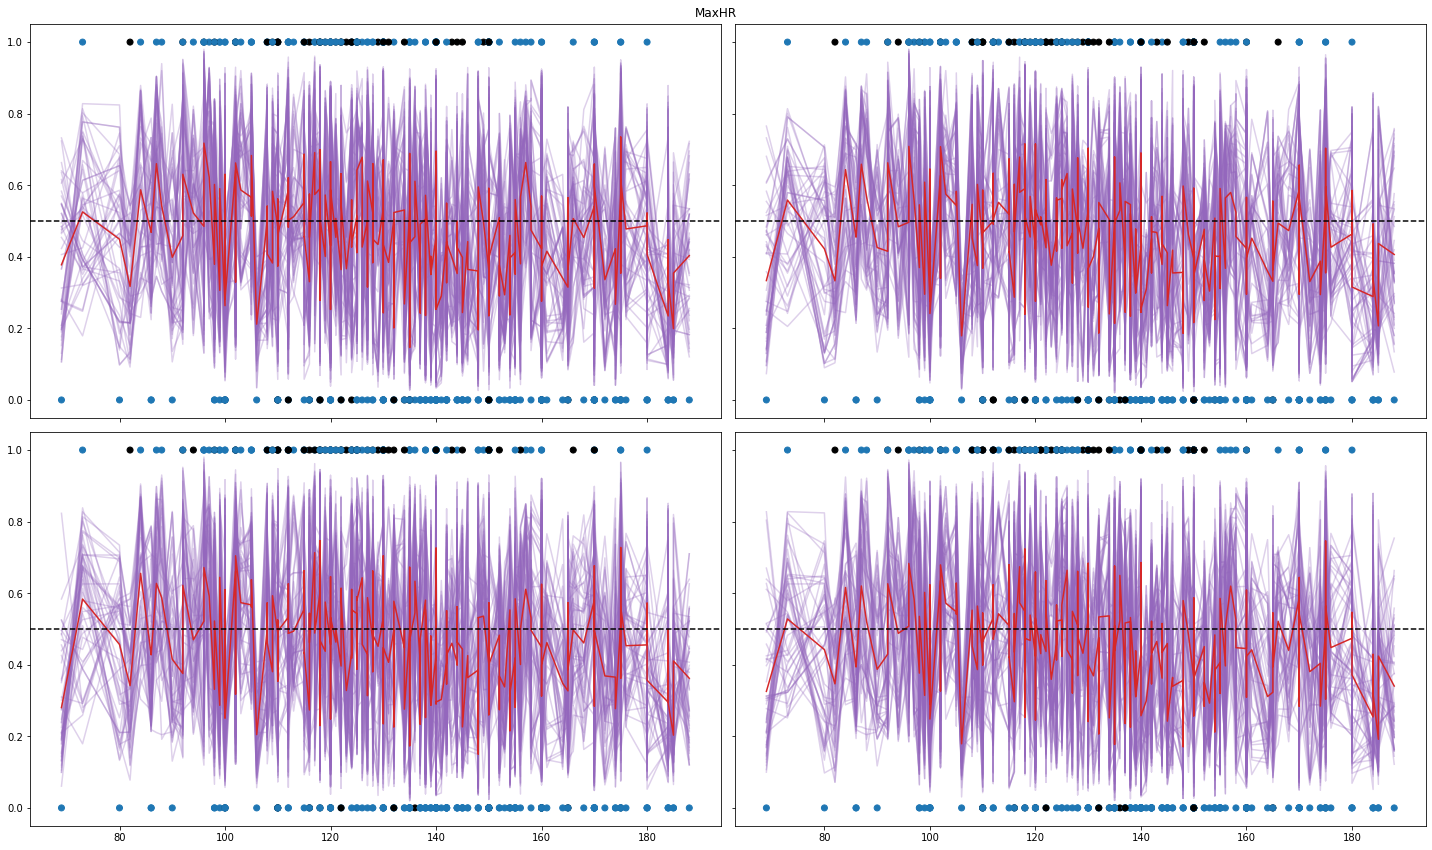

In [101]:
maxhr_posterior_fig = plot_1d_comparison(1, x_train, y_train, posterior_samples.tolist(), dim1_label)